In [ ]:
!pip install pandas
!pip install jsonlines
!pip install sklearn
!pip install pandas
!pip install jsonlines
!pip install sklearn
!pip install tensorflow
# google.colab is not installable via pip. It's a library specific to Google Colab environments.  If you're running this outside of Google Colab, you won't need it.
!pip install sklearn
!pip install tensorflow
!pip install lightgbm

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See

In [ ]:
import pandas as pd
import jsonlines
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# เชื่อมต่อกับ Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json

# ฟังก์ชันในการดึงชื่อคอลัมน์จากไฟล์ .jsonl
def extract_columns_from_jsonl(file_path):
    columns = set()
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # อ่าน JSON ในแต่ละบรรทัด
            data = json.loads(line)
            # รวมชื่อคีย์ทั้งหมดเข้ากับเซ็ต
            columns.update(data.keys())

    return list(columns)

# ระบุพาธไปยังไฟล์ JSONL ของคุณ
file_path = r"/content/drive/MyDrive/Embernew/Untitled folder/train_features_1.jsonl"
columns = extract_columns_from_jsonl(file_path)
print("Columns in the JSONL file:", columns)


Columns in the JSONL file: ['datadirectories', 'sha256', 'avclass', 'md5', 'histogram', 'exports', 'header', 'byteentropy', 'label', 'strings', 'section', 'appeared', 'imports', 'general']


In [ ]:
def get_sample_from_jsonl(file_path, sample_size=5):
    samples = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for i, line in enumerate(file):
            if i >= sample_size:  # หยุดเมื่อได้ครบ sample_size
                break
            samples.append(json.loads(line))
    return samples

# ดึงตัวอย่าง 5 บรรทัด
sample_data = get_sample_from_jsonl(file_path, sample_size=5)

# แสดงตัวอย่างข้อมูล
for idx, record in enumerate(sample_data, start=1):
    print(f"Sample {idx}: {record}")

Sample 1: {'sha256': '2ef9a92ee6c955364564b0df75ee3753473014b2ba162b9df90afe6df9dbb256', 'md5': '7e39aeea7bc21d16b8652516a150b282', 'appeared': '2018-01', 'label': 1, 'avclass': 'sivis', 'histogram': [60782, 5895, 2020, 1487, 2075, 1367, 1145, 856, 2037, 725, 2027, 716, 1418, 903, 672, 1014, 1605, 652, 702, 691, 1048, 927, 641, 599, 795, 636, 598, 598, 677, 629, 597, 571, 8564, 738, 921, 600, 1253, 835, 645, 565, 1015, 919, 958, 868, 917, 784, 1435, 1307, 1470, 1081, 903, 1380, 913, 914, 872, 823, 1013, 1048, 1001, 1289, 1063, 1261, 792, 771, 1852, 3074, 928, 1346, 1238, 1786, 1036, 857, 1028, 1149, 902, 749, 1003, 1101, 1014, 883, 2012, 1152, 1374, 1468, 1242, 1374, 1312, 1447, 975, 848, 716, 1067, 940, 1566, 1298, 1468, 897, 3196, 1406, 2574, 2206, 5376, 2771, 1455, 2052, 2923, 1401, 908, 2522, 1562, 3768, 3473, 2336, 813, 3879, 2968, 5270, 2441, 1323, 1398, 1176, 1245, 843, 944, 984, 1172, 878, 851, 1168, 1116, 1029, 2612, 900, 1471, 827, 767, 953, 1479, 908, 4228, 772, 1342, 753, 7

Data Cleaning


In [ ]:
import json
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ฟังก์ชันในการโหลดข้อมูล JSONL และสร้าง DataFrame
def load_jsonl_to_dataframe(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line))
    return pd.DataFrame(data)

# โหลดข้อมูลจากไฟล์ JSONL
file_path = '/content/drive/MyDrive/Embernew/Untitled folder/train_features_1.jsonl'
df = load_jsonl_to_dataframe(file_path)

# 1. แปลงฟีเจอร์ที่มีหลายมิติ (multi-dimensional) เป็นฟีเจอร์สรุปง่ายขึ้น
df['histogram_mean'] = df['histogram'].apply(lambda x: np.mean(x) if isinstance(x, list) else np.nan)
df['histogram_std'] = df['histogram'].apply(lambda x: np.std(x) if isinstance(x, list) else np.nan)
df['byteentropy_mean'] = df['byteentropy'].apply(lambda x: np.mean(x) if isinstance(x, list) else np.nan)
df['byteentropy_std'] = df['byteentropy'].apply(lambda x: np.std(x) if isinstance(x, list) else np.nan)

# 2. จัดการฟีเจอร์ที่เป็น dictionary เช่น strings
df['numstrings'] = df['strings'].apply(lambda x: x.get('numstrings') if isinstance(x, dict) else np.nan)
df['avg_length'] = df['strings'].apply(lambda x: x.get('avlength') if isinstance(x, dict) else np.nan)
df['printables'] = df['strings'].apply(lambda x: x.get('printables') if isinstance(x, dict) else np.nan)
df['strings_entropy'] = df['strings'].apply(lambda x: x.get('entropy') if isinstance(x, dict) else np.nan)

# 3. นับจำนวน DLL ที่ถูกนำเข้า (imports) เพื่อใช้เป็นฟีเจอร์
df['import_count'] = df['imports'].apply(lambda x: len(x) if isinstance(x, dict) else 0)

# 4. จัดการกับฟีเจอร์ใน general
df['size'] = df['general'].apply(lambda x: x.get('size') if isinstance(x, dict) else np.nan)
df['vsize'] = df['general'].apply(lambda x: x.get('vsize') if isinstance(x, dict) else np.nan)
df['has_debug'] = df['general'].apply(lambda x: x.get('has_debug') if isinstance(x, dict) else np.nan)
df['exports_count'] = df['general'].apply(lambda x: x.get('exports') if isinstance(x, dict) else 0)
df['imports_count'] = df['general'].apply(lambda x: x.get('imports') if isinstance(x, dict) else 0)

# 5. แปลงฟีเจอร์วันที่ 'appeared' ให้อยู่ในรูปแบบ datetime
df['appeared'] = pd.to_datetime(df['appeared'], errors='coerce')

# 6. จัดการค่าหายไป (missing values)
# เติมค่าเฉลี่ยสำหรับฟีเจอร์ที่เป็นตัวเลข
numeric_columns = ['histogram_mean', 'histogram_std', 'byteentropy_mean', 'byteentropy_std',
                   'numstrings', 'avg_length', 'printables', 'strings_entropy',
                   'size', 'vsize', 'exports_count', 'imports_count']
for column in numeric_columns:
    df[column].fillna(df[column].mean(), inplace=True)

# เติมค่าศูนย์ให้กับ import_count และ exports_count ถ้าไม่มีข้อมูล
df['import_count'].fillna(0, inplace=True)
df['exports_count'].fillna(0, inplace=True)

# 7. จัดการข้อมูลเชิงหมวดหมู่ (categorical) เช่น 'avclass' ด้วย Label Encoding
df['avclass'] = df['avclass'].fillna('unknown')
label_encoder = LabelEncoder()
df['avclass_encoded'] = label_encoder.fit_transform(df['avclass'])

# 8. จัดการกับค่าของ 'label' เพื่อให้แน่ใจว่ามีเฉพาะค่าที่จะใช้ในการจำแนกประเภท (0, 1, -1)
df = df[df['label'].isin([0, 1, -1])].copy()

# 9. ลดฟีเจอร์ที่ไม่จำเป็นออก
df.drop(columns=['histogram', 'byteentropy', 'strings', 'general', 'imports', 'exports', 'datadirectories'], inplace=True)

# แสดงผลลัพธ์ DataFrame ที่สะอาด
print("Cleaned DataFrame:")
print(df.head())


<ipython-input-7-1f85171a4d2c>:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-7-1f85171a4d2c>:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Cleaned DataFrame:
                                              sha256  \
0  2ef9a92ee6c955364564b0df75ee3753473014b2ba162b...   
1  50f3f85a10cedf9192f7aa4cd4d2b1ce9e294e23f3dd7e...   
2  f6c68207b3b395feabcbb029c393607db4ff5227ecd5da...   
3  3292ee48fac44b7b70bdfde526f71c09e65764d9b582f5...   
4  b9494c218b74a9774a88307ba83c03da0bee3a80899b47...   

                                md5   appeared  label    avclass  \
0  7e39aeea7bc21d16b8652516a150b282 2018-01-01      1      sivis   
1  09435239e7a0ddfeb78820cf5c31cc06 2018-01-01     -1     upatre   
2  744cac35cdfa2c3a0672184d433cb93e 2018-01-01      0              
3  b6d6f2dc5ef191e23dfc2892ff626168 2018-01-01      0              
4  b6607d4123b0d3afdbca4bdc9a4bcf7a 2018-01-01     -1  startsurf   

                                              header  \
0  {'coff': {'timestamp': 1301832471, 'machine': ...   
1  {'coff': {'timestamp': 1401281511, 'machine': ...   
2  {'coff': {'timestamp': 1512336134, 'machine': ...   
3  {'coff':

In [ ]:
# แสดงจำนวนคอลัมน์ทั้งหมดใน DataFrame
num_columns = df.shape[1]
print(f"Total number of columns: {num_columns}")

# แสดงชื่อคอลัมน์ทั้งหมด
print("Columns:", df.columns.tolist())


Total number of columns: 22
Columns: ['sha256', 'md5', 'appeared', 'label', 'avclass', 'header', 'section', 'histogram_mean', 'histogram_std', 'byteentropy_mean', 'byteentropy_std', 'numstrings', 'avg_length', 'printables', 'strings_entropy', 'import_count', 'size', 'vsize', 'has_debug', 'exports_count', 'imports_count', 'avclass_encoded']


In [ ]:
# กำหนด role ของคอลัมน์
# ระบุว่าคอลัมน์ 'label' เป็น target variable
target_column = 'label'

# ระบุฟีเจอร์ทั้งหมดที่ไม่ใช่ target column
feature_columns = [col for col in df.columns if col != target_column]

# แสดงจำนวนฟีเจอร์และชื่อคอลัมน์ของฟีเจอร์และ target
print(f"Number of feature columns: {len(feature_columns)}")
print("Feature columns:", feature_columns)
print("Target column:", target_column)


Number of feature columns: 21
Feature columns: ['sha256', 'md5', 'appeared', 'avclass', 'header', 'section', 'histogram_mean', 'histogram_std', 'byteentropy_mean', 'byteentropy_std', 'numstrings', 'avg_length', 'printables', 'strings_entropy', 'import_count', 'size', 'vsize', 'has_debug', 'exports_count', 'imports_count', 'avclass_encoded']
Target column: label


In [ ]:
# แสดงจำนวนข้อมูลทั้งหมดใน DataFrame
num_rows = df.shape[0]
print(f"Total number of rows (data points): {num_rows}")


Total number of rows (data points): 158158


In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, False)  # ใช้ GPU อย่างค่อยเป็นค่อยไป
        print("GPU Memory Growth Enabled")
    except RuntimeError as e:
        print(e)


ส่วนเทรนโมเดล
โดยใช้การเทรนด้วย neuron network

In [ ]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# ตรวจสอบและอัปเดตคอลัมน์ฟีเจอร์ โดยเอาคอลัมน์ที่เป็นข้อมูลสตริงออก
# และแปลงคอลัมน์ Timestamp เป็นตัวเลข
feature_columns = [col for col in df.columns if col != 'label' and df[col].dtype != 'object']

for col in feature_columns:
    if df[col].dtype == 'datetime64[ns]':  # ตรวจสอบว่าเป็น Timestamp หรือไม่
        df[col] = pd.to_numeric(df[col])  # แปลง Timestamp เป็นตัวเลข (Unix timestamp)

# 1. เตรียมข้อมูล
# แยก features และ label
X = df[feature_columns].values  # แปลงเป็น numpy array สำหรับ features
y = df['label'].values          # แปลงเป็น numpy array สำหรับ label

# 2. แบ่งข้อมูลเป็นชุดฝึก (train) และชุดทดสอบ (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. ทำการสเกลข้อมูล (Standard Scaling) เพื่อทำให้ข้อมูลอยู่ในช่วงที่เหมาะสมกับ Neural Network
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. แปลง labels เป็นรูปแบบ One-hot encoding ถ้าเป็นการจำแนกหลายประเภท
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 5. สร้างโมเดล Neural Network
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# 6. คอมไพล์โมเดล
model.compile(optimizer=Adam(learning_rate=0.004), loss='categorical_crossentropy', metrics=['accuracy'])

# 7. เทรนโมเดล
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# 8. ประเมินผลการทำงานของโมเดล
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
3954/3954 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8189 - loss: 0.3445 - val_accuracy: 0.8353 - val_loss: 0.3167
Epoch 2/100
3954/3954 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8342 - loss: 0.3179 - val_accuracy: 0.8386 - val_loss: 0.3180
Epoch 3/100
3954/3954 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8375 - loss: 0.3153 - val_accuracy: 0.8408 - val_loss: 0.3134
Epoch 4/100
3954/3954 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8404 - loss: 0.3118 - val_accuracy: 0.8428 - val_loss: 0.3083
Epoch 5/100
3954/3954 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8389 - loss: 0.3118 - val_accuracy: 0.8406 - val_loss: 0.3101
Epoch 6/100
3954/3954 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8418 - loss: 0.3086 - val_accuracy: 0.8437 - val_loss: 0.3151
Epoch 7/100
3954/3954 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8424 - loss: 0.3080 - val_accuracy: 0.8416 - val_loss: 0.3154
Epoch 8/100
3954/3954 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8419 - loss

In [ ]:
model.save('Virus_detect.h5')  # บันทึกเป็นไฟล์ HDF5
print("Model saved as 'Virus_detect.h5'.")

Model saved as 'Virus_detect.h5'.


ประสิทธิภาพโมเดลที่เทรนด้วย neuron network


989/989 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


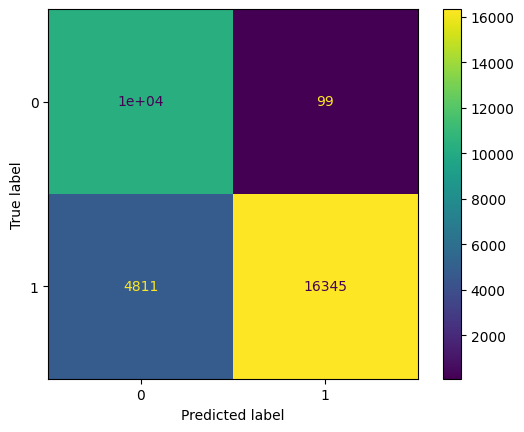

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# คำนวณค่าทำนาย (predicted labels)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # เลือก class ที่มีค่าความน่าจะเป็นสูงสุด
y_true = np.argmax(y_test, axis=1)  # แปลง y_test กลับเป็น class

# สร้าง confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
from sklearn.metrics import classification_report

# สร้างรายงานผลการจำแนกประเภท
report = classification_report(y_true, y_pred_classes)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.99      0.81     10476
           1       0.99      0.77      0.87     21156

    accuracy                           0.84     31632
   macro avg       0.84      0.88      0.84     31632
weighted avg       0.89      0.84      0.85     31632



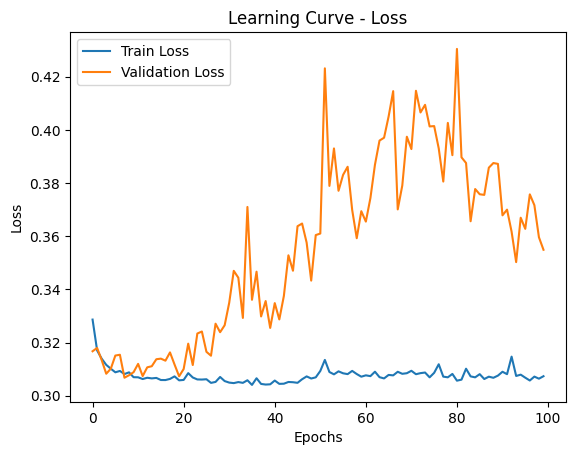

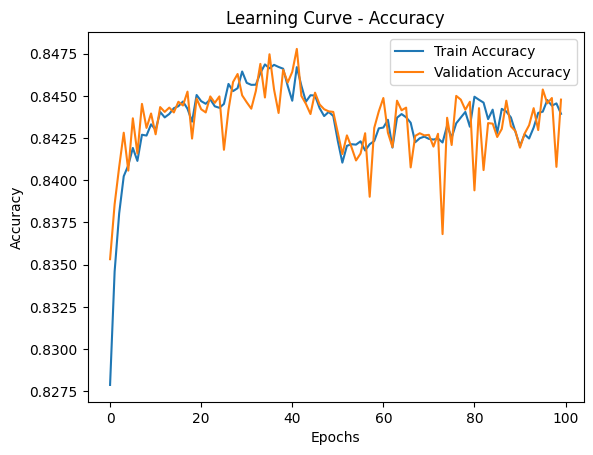

In [ ]:
import matplotlib.pyplot as plt

# พล็อต loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve - Loss')
plt.show()

# พล็อต accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve - Accuracy')
plt.show()


In [ ]:
import os
import json

# Function to combine multiple JSONL files into a single JSONL file
def combine_jsonl_files(input_folder, output_file):
    """
    Combines multiple JSONL files into a single JSONL file.

    Args:
        input_folder (str): Path to the folder containing JSONL files.
        output_file (str): Path to the output combined JSONL file.
    """
    with open(output_file, 'w', encoding='utf-8') as outfile:
        # Loop through all files in the input folder
        for filename in os.listdir(input_folder):
            if filename.endswith('.jsonl'):
                file_path = os.path.join(input_folder, filename)
                print(f"Processing: {file_path}")
                with open(file_path, 'r', encoding='utf-8') as infile:
                    for line in infile:
                        # Write each line to the output file
                        outfile.write(line)
    print(f"Combined JSONL saved to: {output_file}")

# Function to convert a JSONL file to CSV
def convert_jsonl_to_csv(jsonl_file, csv_file):
    """
    Converts a JSONL file to a CSV file.

    Args:
        jsonl_file (str): Path to the input JSONL file.
        csv_file (str): Path to the output CSV file.
    """
    data = []
    with open(jsonl_file, 'r', encoding='utf-8') as infile:
        for line in infile:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    df.to_csv(csv_file, index=False)
    print(f"Converted CSV saved to: {csv_file}")

# Example usage
input_folder = r"/content/drive/MyDrive/Embernew/Untitled folder"  # Path to the folder containing your JSONL files
output_file = r"/content/drive/MyDrive/Embernew/Untitled folder/combined_file.jsonl"  # Output JSONL file
#csv_output_file = r"C:\Users\jinna\Downloads\combined_file.csv"  # Output CSV file

# Combine JSONL files
combine_jsonl_files(input_folder, output_file)

# Convert the combined JSONL file to CSV
#convert_jsonl_to_csv(output_file, csv_output_file)


Processing: /content/drive/MyDrive/Embernew/Untitled folder/train_features_0.jsonl
Processing: /content/drive/MyDrive/Embernew/Untitled folder/train_features_3.jsonl
Processing: /content/drive/MyDrive/Embernew/Untitled folder/train_features_4.jsonl
Processing: /content/drive/MyDrive/Embernew/Untitled folder/train_features_2.jsonl
Processing: /content/drive/MyDrive/Embernew/Untitled folder/train_features_5.jsonl
Processing: /content/drive/MyDrive/Embernew/Untitled folder/train_features_1.jsonl
Processing: /content/drive/MyDrive/Embernew/Untitled folder/combined_file.jsonl


KeyboardInterrupt: 

In [ ]:
pip install flask tensorflow numpy


In [ ]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# อ่านข้อมูลจากไฟล์ JSONL (สมมติว่าไฟล์ชื่อ 'data.jsonl')
data = pd.read_json('/content/drive/MyDrive/Embernew/Untitled folder/train_features_1.jsonl', lines=True)

# ระบุฟีเจอร์และคอลัมน์เป้าหมาย
feature_columns = ['datadirectories', 'sha256', 'avclass', 'md5', 'histogram',
                   'exports', 'header', 'byteentropy', 'strings', 'section',
                   'appeared', 'imports', 'general']
target_column = 'label'

# แยกฟีเจอร์และเป้าหมาย
X = data[feature_columns]
y = data[target_column]

# การเข้ารหัสฟีเจอร์ที่เป็นข้อความ
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ประเมินความแม่นยำของโมเดล
accuracy = model.score(X_test, y_test)
print(f'ความแม่นยำของโมเดล: {accuracy:.2f}')

# บันทึกพารามิเตอร์ของโมเดลลงในไฟล์ .txt
with open('model_parameters.txt', 'w') as file:
    file.write('Intercept:\n')
    file.write(f'{model.intercept_[0]}\n\n')
    file.write('Coefficients:\n')
    for col, coef in zip(feature_columns, model.coef_[0]):
        file.write(f'{col}: {coef}\n')

print('บันทึกพารามิเตอร์ของโมเดลสำเร็จแล้วในไฟล์ model_parameters.txt')


<ipython-input-9-62bb6602d6bc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))
<ipython-input-9-62bb6602d6bc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column].astype(str))
<ipython-input-9-62bb6602d6bc>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

ความแม่นยำของโมเดล: 0.69
บันทึกพารามิเตอร์ของโมเดลสำเร็จแล้วในไฟล์ model_parameters.txt


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# อ่านข้อมูลจากไฟล์ JSON Lines
data = pd.read_json('/content/drive/MyDrive/Embernew/Untitled folder/train_features_1.jsonl', orient='records', lines=True)

# ระบุฟีเจอร์และคอลัมน์เป้าหมาย
feature_columns = [f'Column_{i}' for i in range(2381)]  # Column_0 ถึง Column_2380
target_column = 'label'

# แยกฟีเจอร์และเป้าหมาย
X = data[feature_columns]
y = data[target_column]

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง Dataset สำหรับ LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# กำหนดพารามิเตอร์สำหรับการฝึกโมเดล
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',  # สำหรับปัญหาการจำแนกแบบสองคลาส
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': 0
}

# ฝึกโมเดล
print('เริ่มการฝึกโมเดล...')
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=lgb_eval,
    early_stopping_rounds=100
)

# บันทึกโมเดลลงในไฟล์
gbm.save_model('model.txt')
print('บันทึกโมเดลสำเร็จแล้วในไฟล์ model.txt')

# ทำนายผลและประเมินโมเดล
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# แปลงค่าความน่าจะเป็นเป็นคลาส (0 หรือ 1)
y_pred_classes = [1 if x >= 0.5 else 0 for x in y_pred]

# คำนวณความแม่นยำและ AUC
accuracy = accuracy_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred)

print(f'ความแม่นยำของโมเดล: {accuracy:.2f}')
print(f'AUC ของโมเดล: {auc:.2f}')


KeyError: "None of [Index(['Column_0', 'Column_1', 'Column_2', 'Column_3', 'Column_4', 'Column_5',\n       'Column_6', 'Column_7', 'Column_8', 'Column_9',\n       ...\n       'Column_2371', 'Column_2372', 'Column_2373', 'Column_2374',\n       'Column_2375', 'Column_2376', 'Column_2377', 'Column_2378',\n       'Column_2379', 'Column_2380'],\n      dtype='object', length=2381)] are in the [columns]"

In [ ]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# อ่านข้อมูลจากไฟล์ JSON Lines
data = pd.read_json('/content/drive/MyDrive/Embernew/Untitled folder/train_features_1.jsonl', orient='records', lines=True)

# ระบุฟีเจอร์และคอลัมน์เป้าหมาย
# แก้ไขตรงนี้: แทนที่ feature_columns ด้วยชื่อคอลัมน์ที่ถูกต้องจาก DataFrame ของคุณ
feature_columns = data.columns.tolist()  # รับรายชื่อคอลัมน์ทั้งหมดใน DataFrame
feature_columns.remove('label')  # ลบคอลัมน์เป้าหมายออกจากรายชื่อฟีเจอร์
# หรือระบุชื่อคอลัมน์ที่ต้องการด้วยตนเอง เช่น:
# feature_columns = ['sha256', 'avclass', 'imports', ...]
target_column = 'label'

# แยกฟีเจอร์และเป้าหมาย
X = data[feature_columns]
y = data[target_column]

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง Dataset สำหรับ LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# กำหนดพารามิเตอร์สำหรับการฝึกโมเดล
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',  # สำหรับปัญหาการจำแนกแบบสองคลาส
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': 0
}

# ฝึกโมเดล
print('เริ่มการฝึกโมเดล...')
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=lgb_eval,
    early_stopping_rounds=100
)

# บันทึกโมเดลลงในไฟล์
gbm.save_model('model.txt')
print('บันทึกโมเดลสำเร็จแล้วในไฟล์ model.txt')

# ทำนายผลและประเมินโมเดล
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# แปลงค่าความน่าจะเป็นเป็นคลาส (0 หรือ 1)
y_pred_classes = [1 if x >= 0.5 else 0 for x in y_pred]

# คำนวณความแม่นยำและ AUC
accuracy = accuracy_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred)

print(f'ความแม่นยำของโมเดล: {accuracy:.2f}')
print(f'AUC ของโมเดล: {auc:.2f}')

เริ่มการฝึกโมเดล...


TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# อ่านข้อมูลจากไฟล์ JSON Lines
data = pd.read_json('/content/drive/MyDrive/Embernew/Untitled folder/train_features_1.jsonl', orient='records', lines=True)

# ระบุฟีเจอร์และคอลัมน์เป้าหมาย
# แก้ไขตรงนี้: แทนที่ feature_columns ด้วยชื่อคอลัมน์ที่ถูกต้องจาก DataFrame ของคุณ
feature_columns = data.columns.tolist()  # รับรายชื่อคอลัมน์ทั้งหมดใน DataFrame
feature_columns.remove('label')  # ลบคอลัมน์เป้าหมายออกจากรายชื่อฟีเจอร์
# หรือระบุชื่อคอลัมน์ที่ต้องการด้วยตนเอง เช่น:
# feature_columns = ['sha256', 'avclass', 'imports', ...]
target_column = 'label'

# แยกฟีเจอร์และเป้าหมาย
X = data[feature_columns]
y = data[target_column]

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง Dataset สำหรับ LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# กำหนดพารามิเตอร์สำหรับการฝึกโมเดล
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',  # สำหรับปัญหาการจำแนกแบบสองคลาส
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': 0
}

# ฝึกโมเดล
print('เริ่มการฝึกโมเดล...')
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=100)] # Use callbacks for early stopping
)

# บันทึกโมเดลลงในไฟล์
gbm.save_model('model.txt')
print('บันทึกโมเดลสำเร็จแล้วในไฟล์ model.txt')

# ทำนายผลและประเมินโมเดล
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# แปลงค่าความน่าจะเป็นเป็นคลาส (0 หรือ 1)
y_pred_classes = [1 if x >= 0.5 else 0 for x in y_pred]

# คำนวณความแม่นยำและ AUC
accuracy = accuracy_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred)

print(f'ความแม่นยำของโมเดล: {accuracy:.2f}')
print(f'AUC ของโมเดล: {auc:.2f}')

เริ่มการฝึกโมเดล...


ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: sha256: object, md5: object, appeared: object, avclass: object, histogram: object, byteentropy: object, strings: object, general: object, header: object, section: object, imports: object, exports: object, datadirectories: object

In [ ]:
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder  # นำเข้า LabelEncoder

# อ่านข้อมูลจากไฟล์ JSON Lines
data = pd.read_json('/content/drive/MyDrive/Embernew/Untitled folder/train_features_1.jsonl', orient='records', lines=True)

# ระบุฟีเจอร์และคอลัมน์เป้าหมาย
# แก้ไขตรงนี้: แทนที่ feature_columns ด้วยชื่อคอลัมน์ที่ถูกต้องจาก DataFrame ของคุณ
feature_columns = data.columns.tolist()  # รับรายชื่อคอลัมน์ทั้งหมดใน DataFrame
feature_columns.remove('label')  # ลบคอลัมน์เป้าหมายออกจากรายชื่อฟีเจอร์
# หรือระบุชื่อคอลัมน์ที่ต้องการด้วยตนเอง เช่น:
# feature_columns = ['sha256', 'avclass', 'imports', ...]
target_column = 'label'

# แยกฟีเจอร์และเป้าหมาย
X = data[feature_columns]
y = data[target_column]

# แปลงคอลัมน์ object เป็น numerical
# ใช้ Label Encoding สำหรับคอลัมน์ object ทั้งหมด
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง Dataset สำหรับ LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# กำหนดพารามิเตอร์สำหรับการฝึกโมเดล
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',  # สำหรับปัญหาการจำแนกแบบสองคลาส
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': 0
}

# ฝึกโมเดล
print('เริ่มการฝึกโมเดล...')
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=100)] # Use callbacks for early stopping
)

# บันทึกโมเดลลงในไฟล์
gbm.save_model('model.txt')
print('บันทึกโมเดลสำเร็จแล้วในไฟล์ model.txt')

# ทำนายผลและประเมินโมเดล
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# แปลงค่าความน่าจะเป็นเป็นคลาส (0 หรือ 1)
y_pred_classes = [1 if x >= 0.5 else 0 for x in y_pred]

# คำนวณความแม่นยำและ AUC
accuracy = accuracy_score(y_test, y_pred_classes)
# นำเข้าไลบรารีที่จำเป็น
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder  # นำเข้า LabelEncoder

# อ่านข้อมูลจากไฟล์ JSON Lines

# ระบุฟีเจอร์และคอลัมน์เป้าหมาย
# แก้ไขตรงนี้: แทนที่ feature_columns ด้วยชื่อคอลัมน์ที่ถูกต้องจาก DataFrame ของคุณ
feature_columns = data.columns.tolist()  # รับรายชื่อคอลัมน์ทั้งหมดใน DataFrame
feature_columns.remove('label')  # ลบคอลัมน์เป้าหมายออกจากรายชื่อฟีเจอร์
# หรือระบุชื่อคอลัมน์ที่ต้องการด้วยตนเอง เช่น:
# feature_columns = ['sha256', 'avclass', 'imports', ...]
target_column = 'label'

# แยกฟีเจอร์และเป้าหมาย
X = data[feature_columns]
y = data[target_column]

# แปลงคอลัมน์ object เป็น numerical
# ใช้ Label Encoding สำหรับคอลัมน์ object ทั้งหมด
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง Dataset สำหรับ LightGBM
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# กำหนดพารามิเตอร์สำหรับการฝึกโมเดล
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',  # สำหรับปัญหาการจำแนกแบบสองคลาส
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': 0
}

# ฝึกโมเดล
print('เริ่มการฝึกโมเดล...')
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=1000,
    valid_sets=lgb_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=100)] # Use callbacks for early stopping
)

# บันทึกโมเดลลงในไฟล์
gbm.save_model('model.txt')
print('บันทึกโมเดลสำเร็จแล้วในไฟล์ model.txt')

# ทำนายผลและประเมินโมเดล
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# แปลงค่าความน่าจะเป็นเป็นคลาส (0 หรือ 1)
y_pred_classes = [1 if x >= 0.5 else 0 for x in y_pred]

# คำนวณความแม่นยำและ AUC
accuracy = accuracy_score(y_test, y_pred_classes)

print(f'ความแม่นยำของโมเดล: {accuracy}')
print(f'AUC ของโมเดล: {auc}')

<ipython-input-23-c7da1826d789>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
<ipython-input-23-c7da1826d789>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
<ipython-input-23-c7da1826d789>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

เริ่มการฝึกโมเดล...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.884519	valid_0's binary_logloss: 0.341831
บันทึกโมเดลสำเร็จแล้วในไฟล์ model.txt


<ipython-input-23-c7da1826d789>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
<ipython-input-23-c7da1826d789>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col].astype(str))
<ipython-input-23-c7da1826d789>:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

เริ่มการฝึกโมเดล...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.884519	valid_0's binary_logloss: 0.341831
บันทึกโมเดลสำเร็จแล้วในไฟล์ model.txt
ความแม่นยำของโมเดล: 0.7198090541224077


NameError: name 'auc' is not defined